In [26]:
import json
from scholarmetrics import hindex
import pandas as pd
import numpy as np

def json_readr(file):
    for line in open(file, mode="r"):
        yield json.loads(line)

In [22]:
data = json_readr('dblp_papers_v11.txt')

In [23]:
from tqdm import tqdm
s = dict()
for obj in tqdm(data):
    if 'n_citation' in obj:
        for i in obj['authors']:
            if i['id'] in s:
                s[i['id']].append(obj['n_citation'])
            else:
                s[i['id']] = [obj['n_citation']]

4107340it [04:08, 16502.21it/s]


In [24]:
for x in tqdm(s):
    s[x] = hindex(s[x])

100%|██████████| 3655049/3655049 [00:57<00:00, 63330.75it/s] 


In [27]:
h_data = pd.DataFrame(s.items(), columns=['Author_ID', 'h_index'])

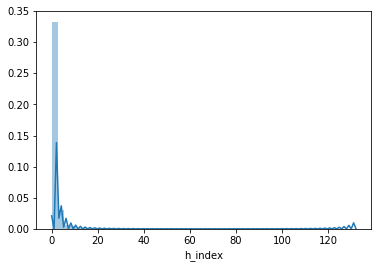

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(h_data['h_index'])

In [33]:
h_data.to_csv('h_index_data.csv')

In [38]:
h_data['h_index'].describe()

count    3.655049e+06
mean     1.449368e+00
std      2.652903e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.320000e+02
Name: h_index, dtype: float64